# <span style="color:blue">Mapping the Journey: An Exploratory Study of Road Safety in Great Britain</span>

> This notebook presents a Exploratory Data Analysis (EDA) of road safety data, specifically focusing on personal injury accidents in Great Britain during the year 2019. The statistics herein pertain exclusively to incidents occurring on public roads, resulting in personal injuries, reported to the police, and subsequently documented using the STATS19 accident reporting form.

### <span style = "color : blue">1. Install Necessary Libraries</span>
 - Common libraries for EDA include:
     1. pandas
     2. NumPy
     3. Matplotlib
     4. seaborn
     5. GeoPandas

In [119]:
# ! pip install pandas numpy matplotlib seaborn geopandas

### <span style = "color : blue">2. Import Libraries</span>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_ind

In [121]:
import geopandas as gpd
from shapely.geometry import Point

In [122]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### <span style = "color : blue">3.Load the Data</span>

In [123]:
df = pd.read_csv('road-safety-data.csv', low_memory = False)

#### Data Inspection

In [124]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2.02E+12,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2.02E+12,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2.02E+12,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2.02E+12,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2.02E+12,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

### <span style = "color : blue">4. Handling Missing Values</span>

In [126]:
len(df)

117536

#### Inspecting Missing Values

In [127]:
# Identify columns with missing values and print the number of missing values in each column
missing_columns = df.columns[df.isnull().any()]
for column in missing_columns:
    missing_count = df[column].isnull().sum()
    print(f"Number of missing values in {column}: {missing_count}")

Number of missing values in Location_Easting_OSGR: 28
Number of missing values in Location_Northing_OSGR: 28
Number of missing values in Longitude: 28
Number of missing values in Latitude: 28
Number of missing values in Time: 63
Number of missing values in LSOA_of_Accident_Location: 5714


#### Removal

In [128]:
# Since the number of missing values is a small proportion of the dataset, removing it does not significantly impact our analysis
df = df.dropna()

In [129]:
df.columns[df.isnull().any()]

Index([], dtype='object')

### <span style = "color: blue">5. Data Cleaning</span>

#### Convert Date and Time to Datetime

In [130]:
# Convert 'Date' and 'Time' to datetime with explicit format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

In [131]:
df['Date'].head()

0   2019-02-18
1   2019-01-15
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Date, dtype: datetime64[ns]

In [132]:
df['Time'].head()

0   1900-01-01 17:50:00
1   1900-01-01 21:45:00
2   1900-01-01 01:50:00
3   1900-01-01 01:20:00
4   1900-01-01 00:40:00
Name: Time, dtype: datetime64[ns]

#### Drop Unnecessary Columns

In [133]:
# Drop 'Accident_Index' if it's just an identifier
df = df.drop(['Accident_Index'], axis=1)

In [134]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,2,...,0,5,1,1,1,0,0,1,3,E01004762
1,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,3,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,3,...,0,0,4,1,1,0,0,1,1,E01000943
3,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,3,...,0,0,4,1,1,0,0,1,1,E01000973
4,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,3,...,0,0,4,1,1,0,0,1,1,E01000546


### <span style = "color: blue">6. Descriptive Statistics</span>

In [135]:
# Statistical Summaries of data
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,...,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000,111760.000000
mean,460671.319873,257602.929313,-1.121215,52.206180,24.827649,2.779062,1.845034,1.301387,4.111220,296.364835,...,308.805494,-0.007623,0.860728,2.050089,1.656031,1.284690,0.073380,0.042162,1.320007,1.396886
std,89196.701336,120314.997032,1.290690,1.086093,19.901929,0.446040,0.705001,0.753374,1.919951,223.525393,...,1157.557346,0.278873,1.996981,1.732032,1.819741,0.593732,0.660711,0.519756,0.466481,0.645577
min,91537.000000,10814.000000,-6.298751,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,399865.000000,174404.750000,-2.003408,51.456438,4.000000,3.000000,1.000000,1.000000,2.000000,75.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,470769.000000,205193.000000,-0.974038,51.732054,21.000000,3.000000,2.000000,1.000000,4.000000,300.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,530294.250000,354503.750000,-0.122868,53.082937,44.000000,3.000000,2.000000,1.000000,6.000000,494.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655244.000000,656571.000000,1.757476,55.802413,63.000000,3.000000,17.000000,52.000000,7.000000,753.000000,...,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000


### <span style = "color:blue">7. Data Visualization</span>
#### <span style = "color:purple">Feature Engineering and Data Visualization</span>

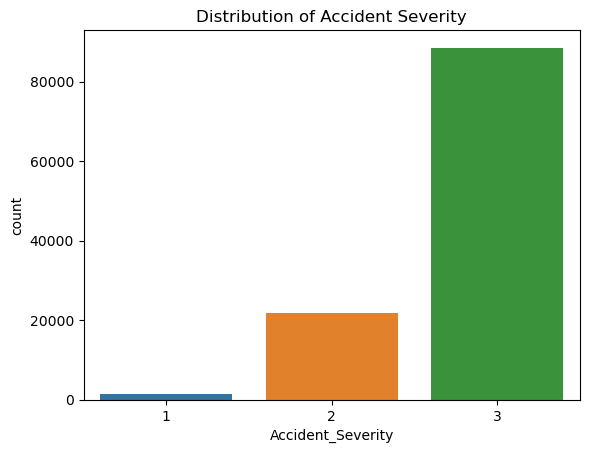

In [136]:
# Distribution of Accident severity
sns.countplot(x='Accident_Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

#### <span style = "color:purple">Geospatial Analysis</span>

##### Get Boundaries of Great Britain

In [137]:
# Download the world map shapefile from naturalearthdata.com
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres').replace(".zip", ".shp"))

# Filter to get the boundaries of Great Britain
gbr_boundaries = world[world['name'].isin(['United Kingdom', 'Ireland'])]

# Save the Great Britain boundaries shapefile
gbr_boundaries.to_file('gbr_boundaries.shp')

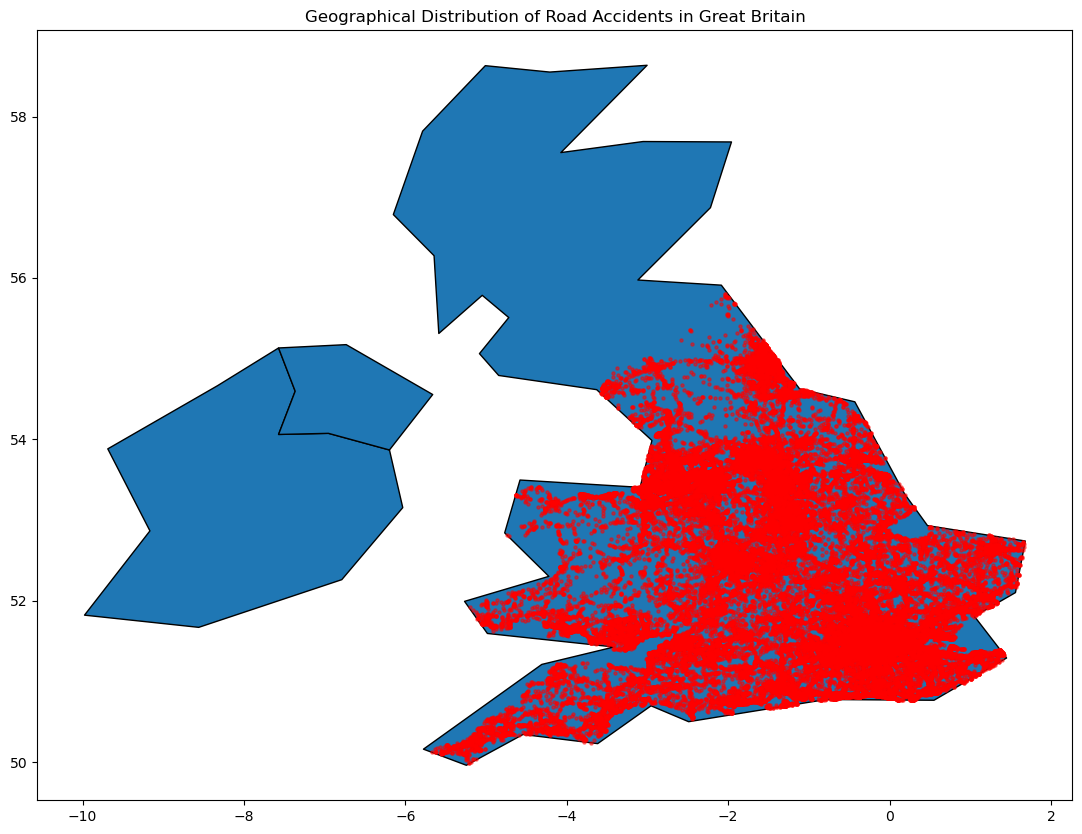

In [138]:
# Geographical Distribution of Road Accidents in Great Britain
# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Filter the GeoDataFrame to include only points within the boundaries of Great Britain
gdf = gpd.sjoin(gdf, gbr_boundaries[['geometry']], how='inner', op='within')

# Basic Map of Great Britain
ax = gbr_boundaries.plot(figsize=(15, 10), edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Geographical Distribution of Road Accidents in Great Britain')
plt.show()

In [139]:
warnings.resetwarnings()

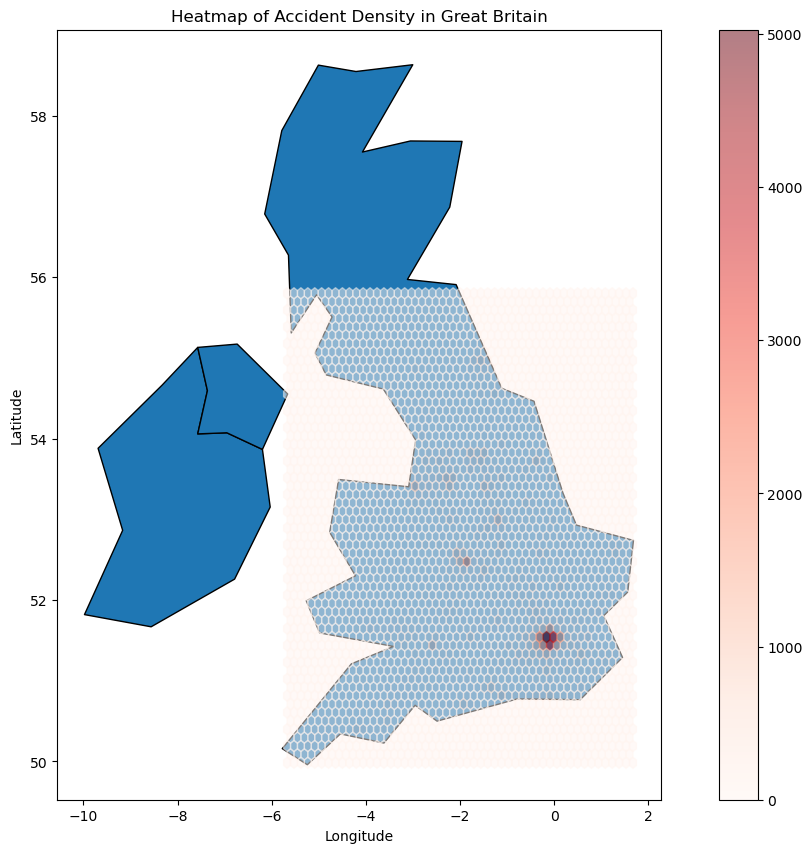

In [140]:
# Heatmap of Accident Density
fig, ax = plt.subplots(figsize=(15, 10))
gbr_boundaries.plot(ax=ax, edgecolor='black')

# Specify 'x' and 'y' columns for hexbin plot
gdf.plot(ax=ax, kind='hexbin', x='Longitude', y='Latitude', gridsize=50, cmap='Reds', alpha=0.5, legend=True)

plt.title('Heatmap of Accident Density in Great Britain')
plt.show()

#### <span style = "color:purple">Number of accidents during different times of the day</span>

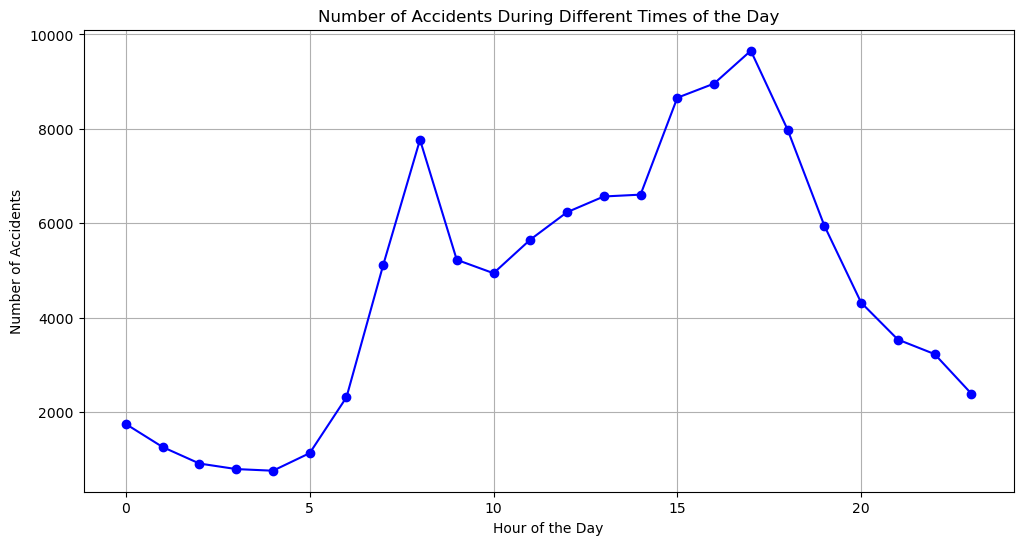

In [141]:
# Create a new column for the hour of the day
df['Hour'] = df['Time'].dt.hour

# Group by the hour and count the number of accidents
hourly_accidents = df.groupby('Hour').size()

# Plotting the number of accidents during different times of the day
plt.figure(figsize=(12, 6))
hourly_accidents.plot(kind='line', marker='o', color='blue')
plt.title('Number of Accidents During Different Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

#### <span style = "color:purple">Number of accidents during different days of the week</span>

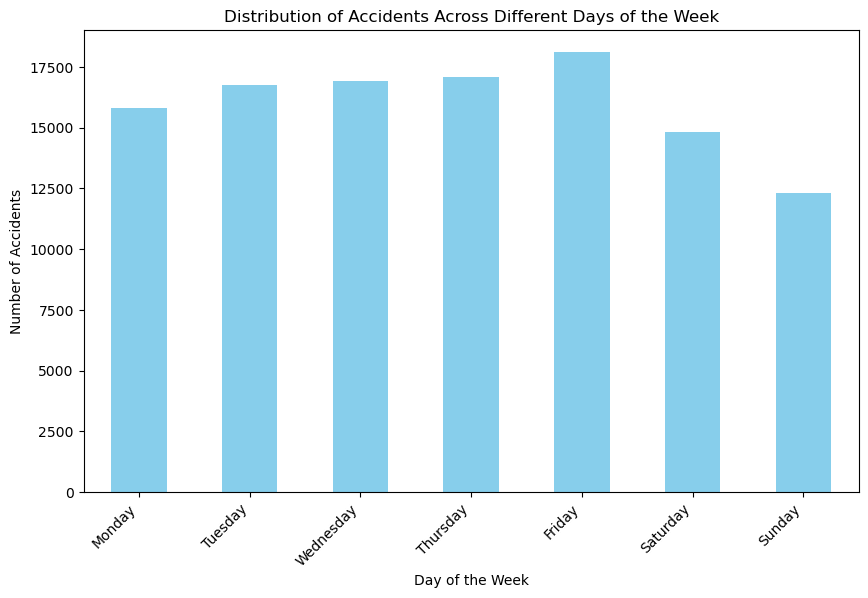

In [142]:
# Create a new column for the day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Group by the day of the week and count the number of accidents
daily_accidents = df['Day_of_Week'].value_counts()

# Sort the days of the week in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_accidents = daily_accidents.reindex(days_order)

# Plotting the distribution of accidents across different days of the week
plt.figure(figsize=(10, 6))
daily_accidents.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accidents Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### <span style = "color:purple">Weather Conditions vs Number of Accidents</span>

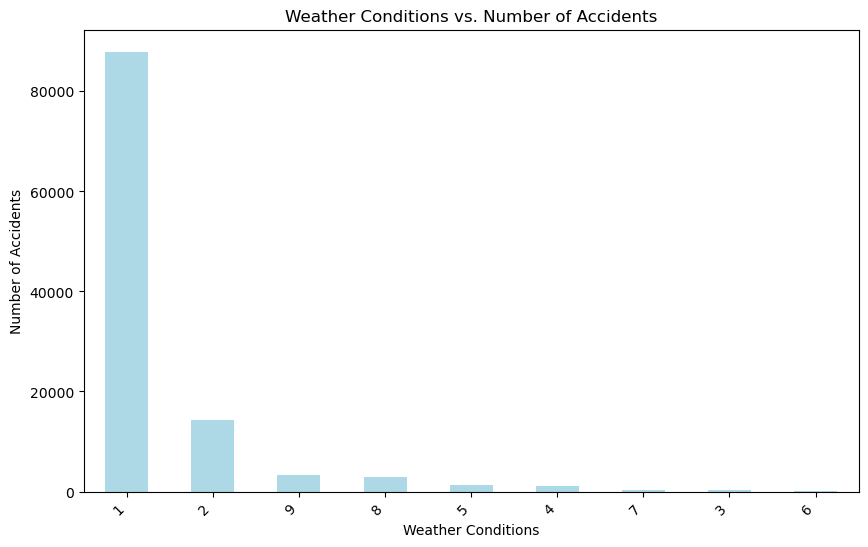

In [143]:
weather_accidents = df['Weather_Conditions'].value_counts()

# Plotting Weather Conditions vs. Number of Accidents
plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color='lightblue')
plt.title('Weather Conditions vs. Number of Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

#### <span style = "color:purple">Road Surface Conditions vs Number of Accidents</span>

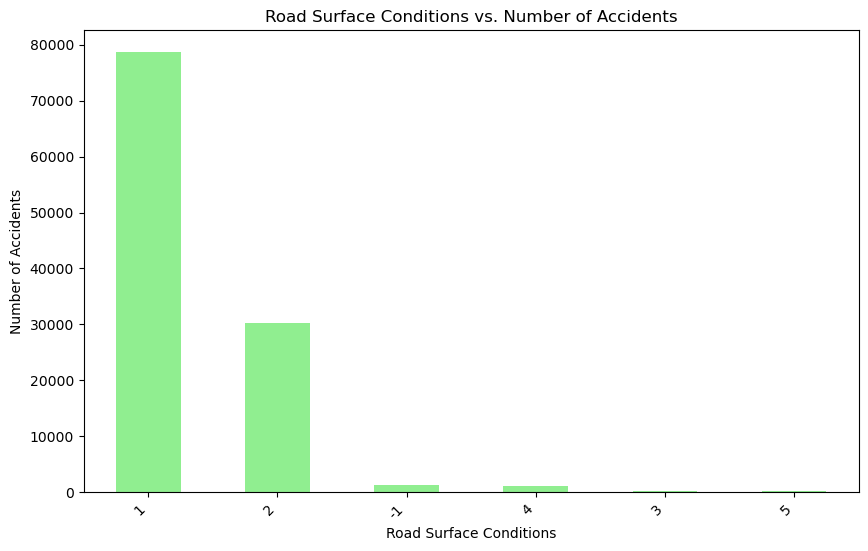

In [144]:
road_surface_accidents = df['Road_Surface_Conditions'].value_counts()

# Plotting Road Surface Conditions vs. Number of Accidents
plt.figure(figsize=(10, 6))
road_surface_accidents.plot(kind='bar', color='lightgreen')
plt.title('Road Surface Conditions vs. Number of Accidents')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

#### <span style = "color:purple">Distribution of accidents on different types of roads</span>

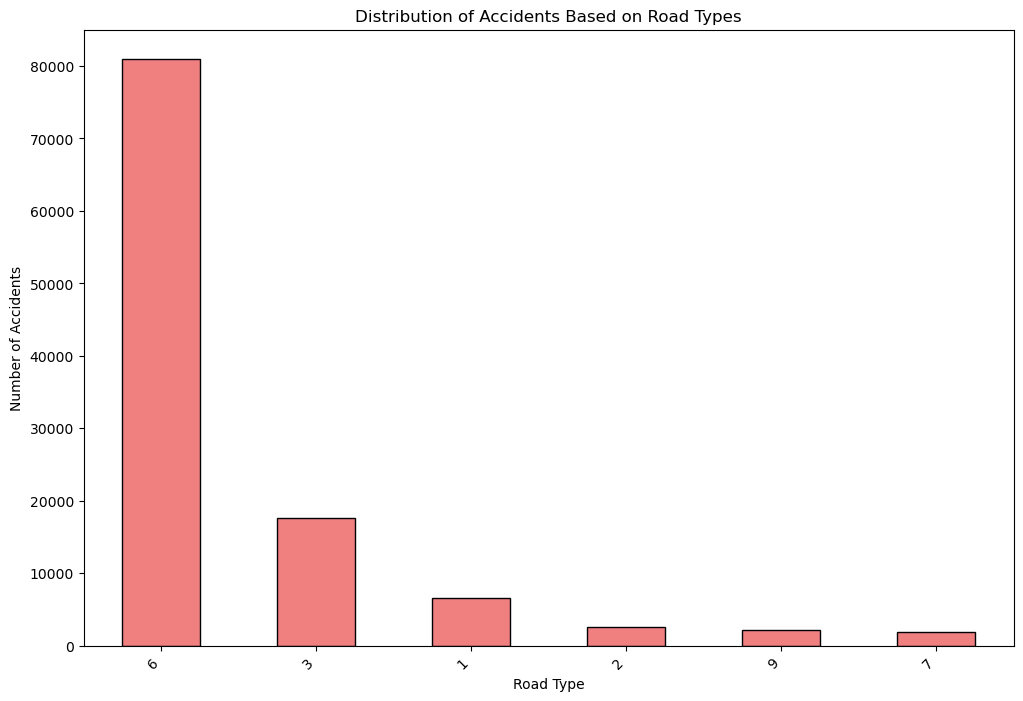

In [145]:
road_type_distribution = df['Road_Type'].value_counts()

# Plotting the distribution of accidents based on different road types
plt.figure(figsize=(12, 8))
road_type_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Accidents Based on Road Types')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

#### <span style = "color:purple">Number of accidents in urban and rural areas</span>

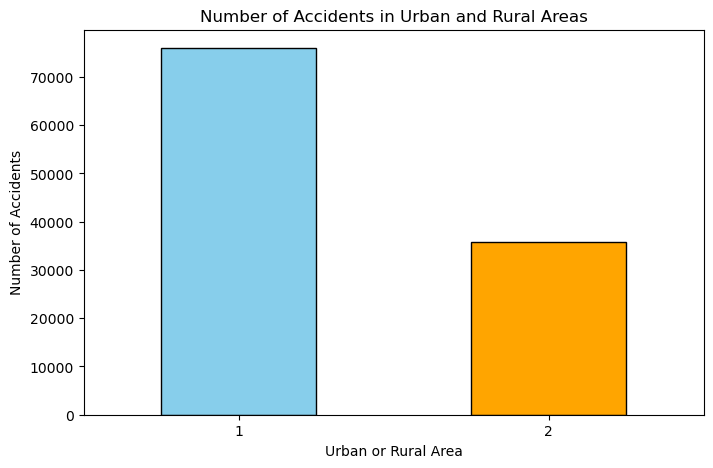

In [146]:
urban_rural_accidents = df['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 5))
urban_rural_accidents.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Number of Accidents in Urban and Rural Areas')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

#### <span style = "color:purple">Police officer attended scene of accident</span>

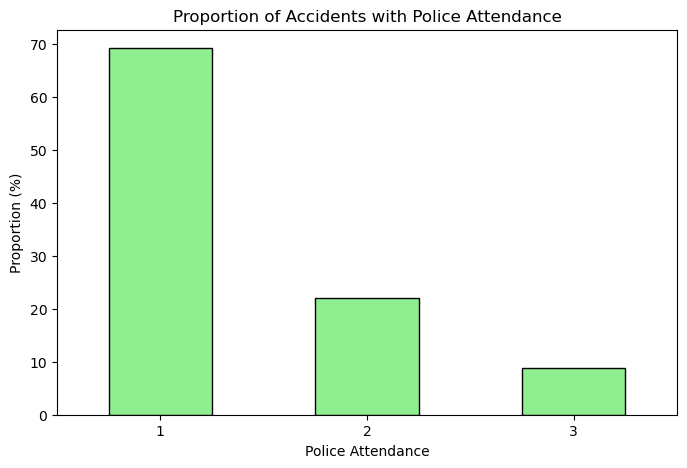

In [147]:
police_attendance_proportion = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=True) * 100

# Plotting the proportion of police attendance
plt.figure(figsize=(8, 5))
police_attendance_proportion.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Proportion of Accidents with Police Attendance')
plt.xlabel('Police Attendance')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.show()

#### <span style = "color:purple">Monthly distribution of accidents</span>

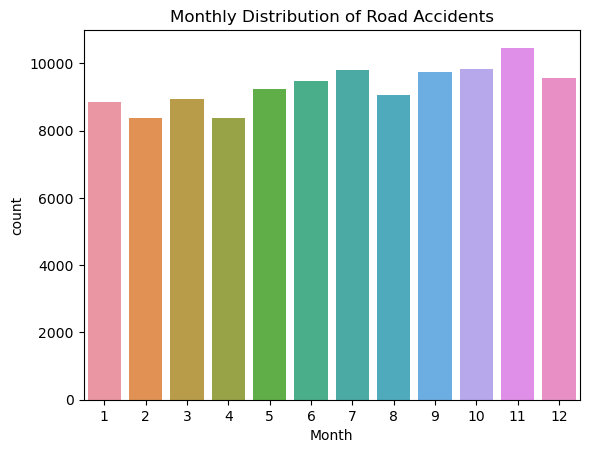

In [148]:
df['Month'] = df['Date'].dt.month

sns.countplot(x='Month', data=df)
plt.title('Monthly Distribution of Road Accidents')
plt.show()

### <span style = "color:blue">8. Correlation Analysis</span>

In [149]:
df.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
Location_Easting_OSGR,1.000000,-0.246708,0.999779,-0.250892,-0.185234,0.028380,0.019173,-0.036412,-0.251746,-0.037668,...,0.060187,0.016152,0.008764,-0.060481,-0.016265,-0.012401,-0.118045,0.119734,-0.003375,0.005659
Location_Northing_OSGR,-0.246708,1.000000,-0.242175,0.999960,-0.384256,-0.046925,-0.010764,0.030463,-0.330587,0.052911,...,-0.012025,-0.019049,-0.002939,0.038851,0.005517,0.004785,0.025761,-0.023184,0.007993,-0.003240
Longitude,0.999779,-0.242175,1.000000,-0.246403,-0.182908,0.028036,0.019059,-0.035989,-0.249278,-0.036414,...,0.059336,0.015950,0.007860,-0.059989,-0.016269,-0.012487,-0.115876,0.118822,-0.003501,0.005617
Latitude,-0.250892,0.999960,-0.246403,1.000000,-0.384159,-0.046795,-0.010692,0.030396,-0.330264,0.052785,...,-0.011738,-0.019109,-0.003024,0.038893,0.005510,0.004735,0.025106,-0.023353,0.008000,-0.003246
Police_Force,-0.185234,-0.384256,-0.182908,-0.384159,1.000000,-0.047146,0.024680,0.050807,0.980895,0.059046,...,-0.138160,-0.002180,-0.051499,0.079919,0.035485,0.038000,0.337729,-0.214073,-0.020648,-0.001357
Accident_Severity,0.028380,-0.046925,0.028036,-0.046795,-0.047146,1.000000,0.066060,-0.077943,-0.050629,0.006861,...,0.012467,-0.046724,0.030698,-0.020456,-0.004861,-0.016517,-0.096604,0.162234,-0.001506,0.003473
Number_of_Vehicles,0.019173,-0.010764,0.019059,-0.010692,0.024680,0.066060,1.000000,0.216763,0.023557,-0.133583,...,-0.060543,-0.062759,-0.035279,-0.023844,-0.008397,-0.026343,0.057115,-0.036475,0.003019,-0.007100
Number_of_Casualties,-0.036412,0.030463,-0.035989,0.030396,0.050807,-0.077943,0.216763,1.000000,0.054850,-0.083813,...,-0.029927,0.030061,-0.024626,0.027441,0.015160,0.009434,0.135024,-0.109581,0.021763,0.001313
Local_Authority_(District),-0.251746,-0.330587,-0.249278,-0.330264,0.980895,-0.050629,0.023557,0.054850,1.000000,0.067712,...,-0.140238,-0.004336,-0.051485,0.084663,0.035094,0.038241,0.334629,-0.217551,-0.020183,-0.001315
1st_Road_Class,-0.037668,0.052911,-0.036414,0.052785,0.059046,0.006861,-0.133583,-0.083813,0.067712,1.000000,...,-0.112803,-0.037161,0.008633,-0.004170,-0.016662,-0.003613,-0.183932,0.036155,0.029591,-0.007038


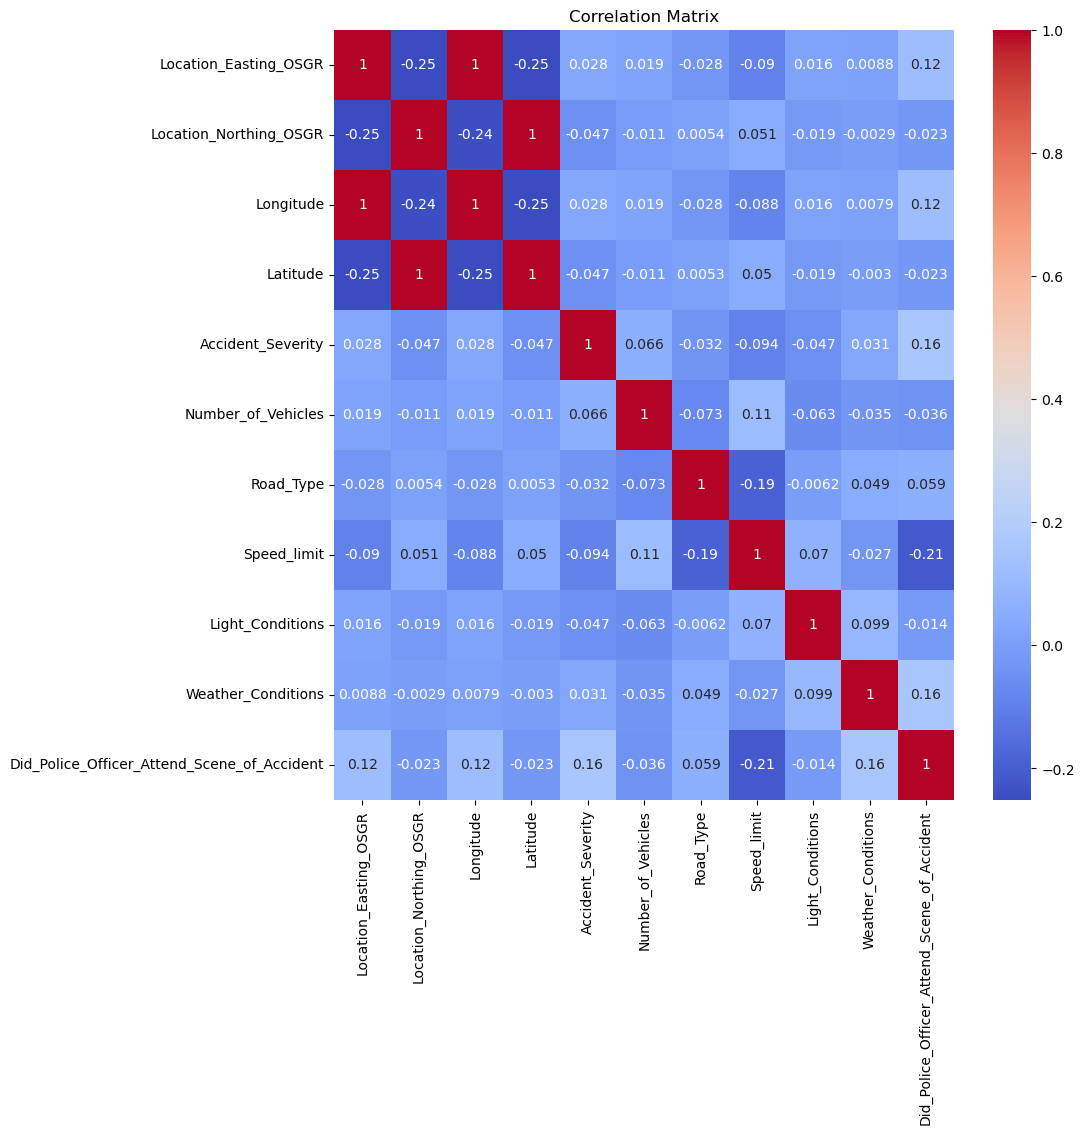

In [150]:
'''
Dealing with a large number of features, the correlation matrix can indeed become congested, making it challenging to 
interpret.
'''
# Create a heatmap
plt.figure(figsize=(10, 10))
selected_features = df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Accident_Severity', 
                        'Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 
                        'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']]
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### <span style = "color:blue">9. Outlier Detection</span>

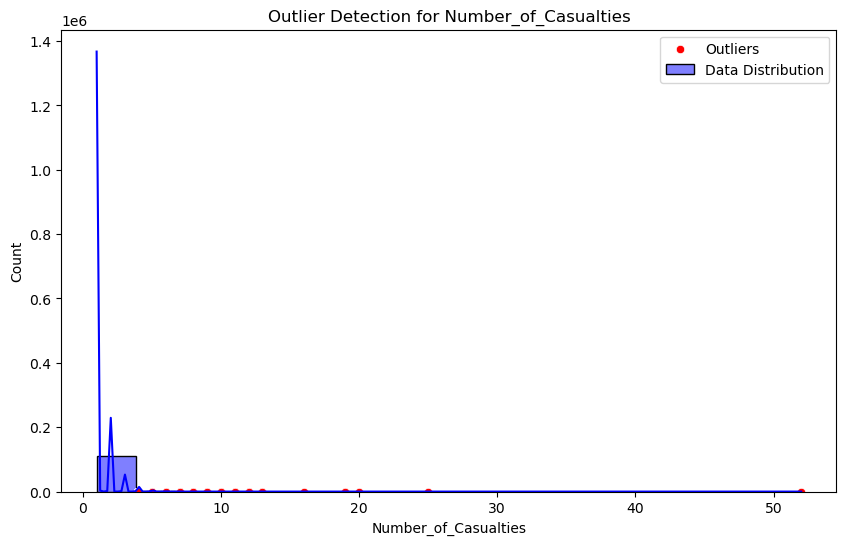

In [151]:
# Outlier analysis on a numerical column in the dataset
numerical_column = 'Number_of_Casualties'

# Detect outliers using z-score
z_scores = zscore(df[numerical_column])
df['Z_Scores'] = z_scores

# Set a threshold for outlier detection
outlier_threshold = 3
outliers = df[(df['Z_Scores'] > outlier_threshold) | (df['Z_Scores'] < -outlier_threshold)]

# Visualize the distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df[numerical_column], kde=True, color='blue', label='Data Distribution')
sns.scatterplot(data=outliers, x=numerical_column, y='Z_Scores', color='red', label='Outliers')
plt.title(f'Outlier Detection for {numerical_column}')
plt.xlabel(numerical_column)
plt.legend()
plt.show()

In [152]:
# Let's perform outlier analysis on all the numerical columns and remove the possible outliers from the dataset using z-scores
outlier_threshold = 3 # outlier threshold

# Iterate through each numerical column for outlier detection and removal
for column in df.select_dtypes(include='number').columns:
    z_scores = zscore(df[column])
    outliers = df[(z_scores > outlier_threshold) | (z_scores < -outlier_threshold)]
    
    # Remove outliers from the dataset
    df = df[~df.index.isin(outliers.index)]

# Save the cleaned dataset to a new file (cleaned-data.csv)
df.to_csv('cleaned-data.csv', index=False)

## <span style = "color:green">Iterate</span>

### <span style = "color:olive">Load the Data</span>

In [153]:
cleaned_df = pd.read_csv('cleaned-data.csv', low_memory = False)

### <span style = "color:olive">Data Inspection</span>

In [154]:
cleaned_df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Month,Z_Scores
0,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,Tuesday,...,1,1,0,0,1,1,E01000943,1,1,-0.400051
1,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,Tuesday,...,1,1,0,0,1,1,E01000973,1,1,-0.400051
2,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,Tuesday,...,1,1,0,0,1,1,E01000546,0,1,0.927316
3,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,2019-01-01,Tuesday,...,1,1,0,0,1,1,E01001043,1,1,-0.400051
4,548535.0,188113.0,0.141957,51.572326,1,3,2,1,2019-01-01,Tuesday,...,1,1,0,0,1,1,E01000031,1,1,-0.400051


In [155]:
cleaned_df.shape

(80825, 34)

### <span style = "color:olive">Statistical Summaries</span>

In [156]:
cleaned_df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month,Z_Scores
count,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,...,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.000000,80825.00000,80825.000000
mean,462036.772125,258666.295886,-1.101327,52.215868,25.367127,2.801039,1.777928,1.150065,302.480136,4.256344,...,1.979709,1.216950,1.269298,-0.001175,-0.000458,1.314111,1.347727,13.602623,6.67786,-0.200860
std,87339.157483,120987.737874,1.265283,1.091789,19.813028,0.399221,0.561639,0.357137,222.089871,1.466002,...,1.670247,0.615735,0.443598,0.087222,0.071135,0.464164,0.585931,5.121008,3.39488,0.474052
min,196651.000000,38741.000000,-4.859900,50.235597,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.00000,-0.400051
25%,400721.000000,173638.000000,-1.990862,51.449610,5.000000,3.000000,1.000000,1.000000,91.000000,3.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,4.00000,-0.400051
50%,467855.000000,206849.000000,-1.010244,51.750295,22.000000,3.000000,2.000000,1.000000,300.000000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,14.000000,7.00000,-0.400051
75%,530341.000000,361269.000000,-0.122069,53.143128,44.000000,3.000000,2.000000,1.000000,498.000000,6.000000,...,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,17.000000,10.00000,-0.400051
max,655244.000000,616096.000000,1.757476,55.438298,63.000000,3.000000,3.000000,2.000000,753.000000,6.000000,...,7.000000,6.000000,2.000000,2.000000,1.000000,2.000000,3.000000,23.000000,12.00000,0.927316


### <span style = "color:olive">Data Visualization</span>

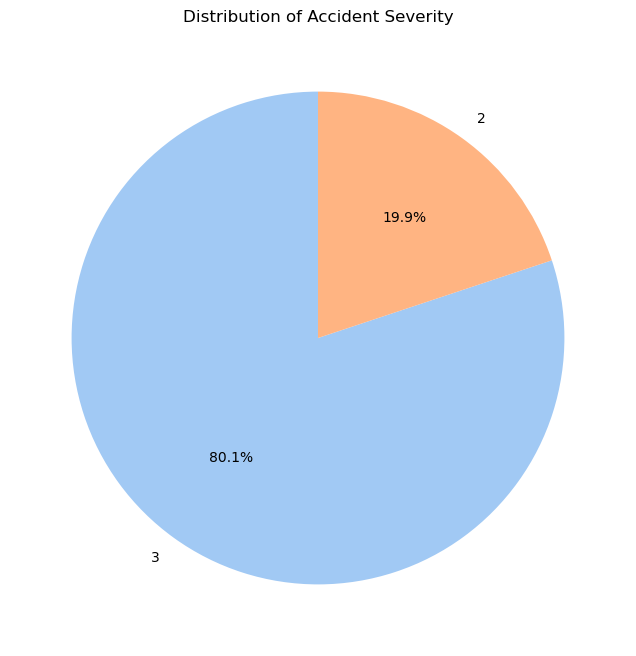

In [157]:
# Distribution of Accident severity
plt.figure(figsize=(8, 8))
severity_counts = cleaned_df['Accident_Severity'].value_counts()
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Accident Severity')
plt.show()

### <span style = "color:olive">Correlation Analysis</span>

In [159]:
cleaned_df.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month,Z_Scores
Location_Easting_OSGR,1.000000,-0.261143,0.999779,-0.266326,-0.153806,0.006225,0.026732,-0.017798,-0.221422,-0.042082,...,0.015269,-0.034376,-0.034013,-0.026671,-0.014250,-0.087058,0.056792,-0.005811,0.003295,-0.017798
Location_Northing_OSGR,-0.261143,1.000000,-0.254738,0.999960,-0.405801,-0.033548,-0.020774,0.019606,-0.350134,0.062702,...,-0.021787,-0.015906,0.011876,0.015424,0.014321,0.014938,0.034428,0.005795,0.001605,0.019606
Longitude,0.999779,-0.254738,1.000000,-0.259950,-0.152228,0.006185,0.026618,-0.017418,-0.219606,-0.040727,...,0.014962,-0.034713,-0.033866,-0.026552,-0.014240,-0.085031,0.056662,-0.005858,0.003183,-0.017418
Latitude,-0.266326,0.999960,-0.259950,1.000000,-0.405699,-0.033387,-0.020714,0.019529,-0.349767,0.062650,...,-0.021833,-0.015800,0.011883,0.015514,0.014366,0.014380,0.034369,0.005798,0.001625,0.019529
Police_Force,-0.153806,-0.405801,-0.152228,-0.405699,1.000000,-0.026931,0.014111,0.042066,0.979705,0.059507,...,0.000185,0.022984,0.034447,0.038646,0.021346,0.320809,-0.126317,-0.018559,-0.002099,0.042066
Accident_Severity,0.006225,-0.033548,0.006185,-0.033387,-0.026931,1.000000,0.105994,-0.014475,-0.029224,-0.013397,...,-0.026892,-0.003182,-0.002614,-0.010624,-0.009742,-0.058208,0.143753,-0.006483,-0.000076,-0.014475
Number_of_Vehicles,0.026732,-0.020774,0.026618,-0.020714,0.014111,0.105994,1.000000,0.151587,0.010432,-0.112925,...,-0.080761,-0.037565,-0.044117,-0.003560,0.001172,0.033601,0.015653,0.002785,-0.006146,0.151587
Number_of_Casualties,-0.017798,0.019606,-0.017418,0.019529,0.042066,-0.014475,0.151587,1.000000,0.043915,-0.058634,...,0.015268,0.012244,0.022389,0.008840,0.001730,0.112862,-0.094813,0.009348,-0.002804,1.000000
Local_Authority_(District),-0.221422,-0.350134,-0.219606,-0.349767,0.979705,-0.029224,0.010432,0.043915,1.000000,0.069891,...,-0.001827,0.025075,0.038000,0.041068,0.022928,0.316281,-0.124104,-0.018229,-0.000912,0.043915
1st_Road_Class,-0.042082,0.062702,-0.040727,0.062650,0.059507,-0.013397,-0.112925,-0.058634,0.069891,1.000000,...,-0.036576,-0.022150,-0.017667,0.002260,-0.001722,-0.187136,0.048792,0.034898,-0.008081,-0.058634


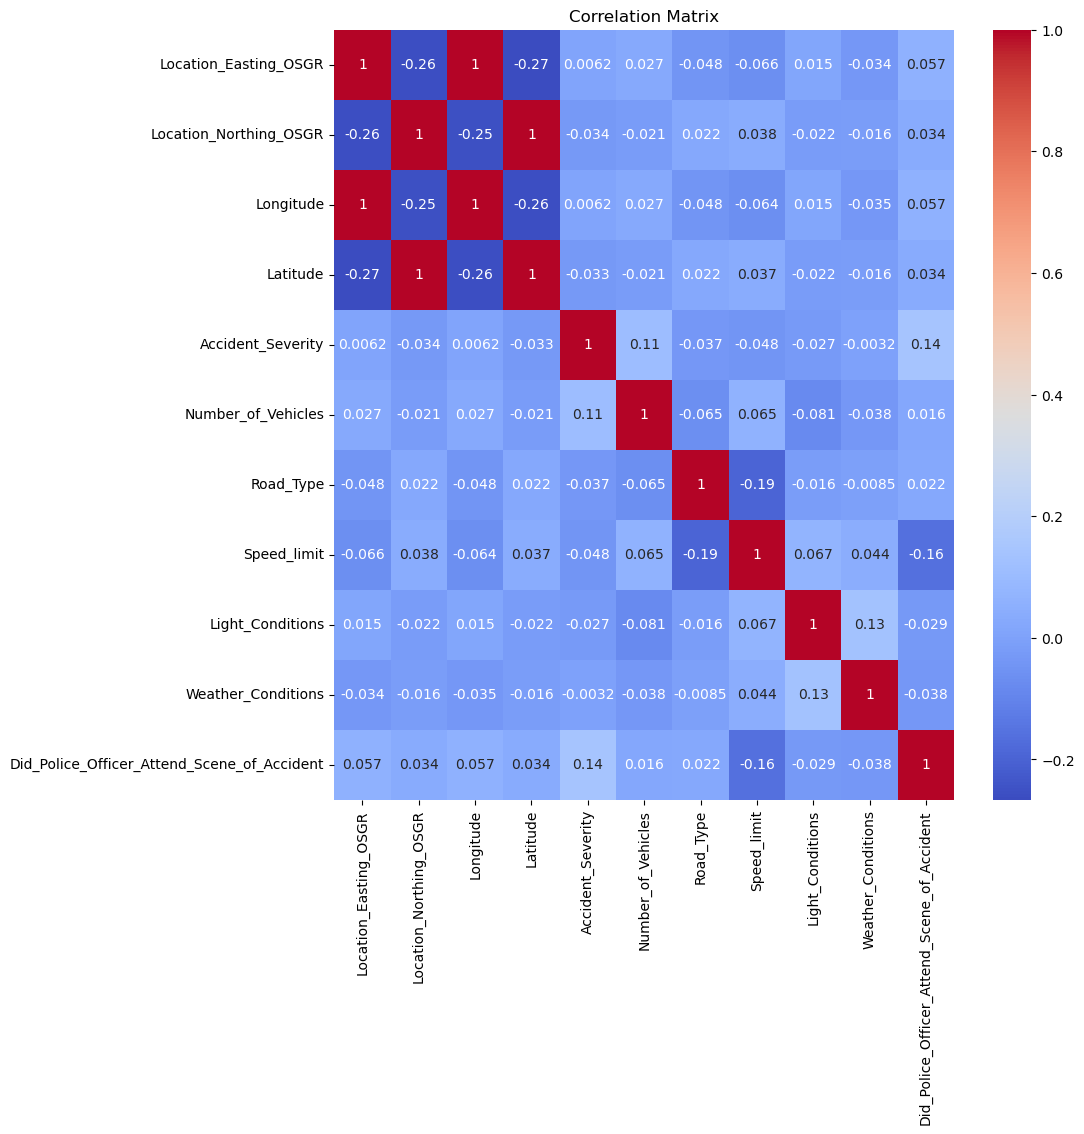

In [160]:
# Create a heatmap
plt.figure(figsize=(10, 10))
selected_features = df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Accident_Severity', 
                        'Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 
                        'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']]
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### <span style = "color:olive">Hypothesis Testing</span>

#### <span style = "color:purple">Difference between urban and rural regions</span>

In [161]:
# Define the condition for the two groups
urban_condition = 1
rural_condition = 2

categorical_column = 'Accident_Severity'

# Separate data into two groups for hypothesis testing (e.g., comparing accident severity)
group_urban = df[df['Urban_or_Rural_Area'] == urban_condition][categorical_column]
group_rural = df[df['Urban_or_Rural_Area'] == rural_condition][categorical_column]

# Perform t-test
t_statistic, p_value = ttest_ind(group_urban, group_rural)

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference between Urban and Rural groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between Urban and Rural groups.')

T-Statistic: 16.57636622686952
P-Value: 1.3061220953688611e-61
Reject the null hypothesis. There is a significant difference between Urban and Rural groups.
